 **Use Iris and Heart Disease database to perform the following:**

**Classification tasks include 50-50% training and testing using the SVM classifier.**

1.   Apply PCA to the dataset.
2.   Perform classification with 50-50% training and test on 1st PCA component and 2nd
3. PCAcomponent




In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import kagglehub


# Download the Heart Disease dataset from Kaggle
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

print("Path to dataset files:", path)

# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

# Step 2: Load the Dataset
# For this example, let's assume the datasets are stored in CSV files

# Iris dataset
# Convert the Iris Bunch object to a pandas DataFrame
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data['target'] = iris.target # Add the target column to the DataFrame

# Heart Disease dataset
heart_data = pd.read_csv(path + '/heart.csv')

# Step 3: Data Preprocessing
# Iris dataset
X_iris = iris_data.drop(columns=['target'])  # Replace 'species' with target column name in Iris dataset
y_iris = iris_data['target']

# Heart Disease dataset
X_heart = heart_data.drop(columns=['target'])  # Replace 'target' with the target column name in Heart Disease dataset
y_heart = heart_data['target']
# Step 4: Train-Test Split (50-50 split)
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.5, random_state=42)
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X_heart, y_heart, test_size=0.5, random_state=42)

# Step 5: Train SVM Classifier
# For Iris dataset
svm_iris = SVC(kernel='linear', random_state=42)  # You can try other kernels like 'rbf', 'poly', etc.
svm_iris.fit(X_train_iris, y_train_iris)

# For Heart Disease dataset
svm_heart = SVC(kernel='linear', random_state=42)
svm_heart.fit(X_train_heart, y_train_heart)

# Step 6: Evaluate Model
# Iris dataset evaluation
y_pred_iris = svm_iris.predict(X_test_iris)
print("Iris Dataset - Classification Report:\n", classification_report(y_test_iris, y_pred_iris))
print("Iris Dataset - Confusion Matrix:\n", confusion_matrix(y_test_iris, y_pred_iris))
print("Iris Dataset - Accuracy:", accuracy_score(y_test_iris, y_pred_iris))

# Heart Disease dataset evaluation
y_pred_heart = svm_heart.predict(X_test_heart)
print("Heart Disease Dataset - Classification Report:\n", classification_report(y_test_heart, y_pred_heart))
print("Heart Disease Dataset - Confusion Matrix:\n", confusion_matrix(y_test_heart, y_pred_heart))
print("Heart Disease Dataset - Accuracy:", accuracy_score(y_test_heart, y_pred_heart))

Path to dataset files: /root/.cache/kagglehub/datasets/johnsmith88/heart-disease-dataset/versions/2
Iris Dataset - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        23

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

Iris Dataset - Confusion Matrix:
 [[29  0  0]
 [ 0 23  0]
 [ 0  0 23]]
Iris Dataset - Accuracy: 1.0
Heart Disease Dataset - Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.74      0.79       254
           1       0.77      0.87      0.82       259

    accuracy                           0.81       513
   macro avg       0.81      0.80      0.80       513
weighted avg       0.81      0.81      0.80       513

Heart

Applying PCA on Iris Dataset
Iris Dataset - Explained Variance by Principal Components: [0.92461872 0.05306648]


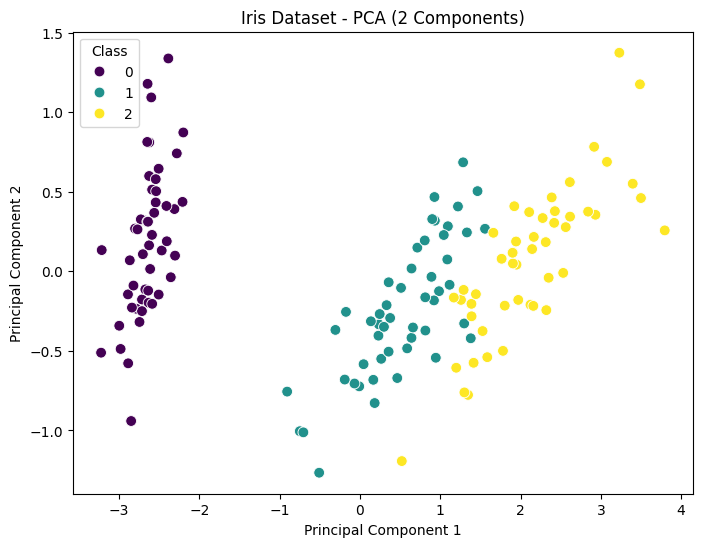

Applying PCA on Heart Disease Dataset
Heart Disease Dataset - Explained Variance by Principal Components: [0.74530931 0.15199174]


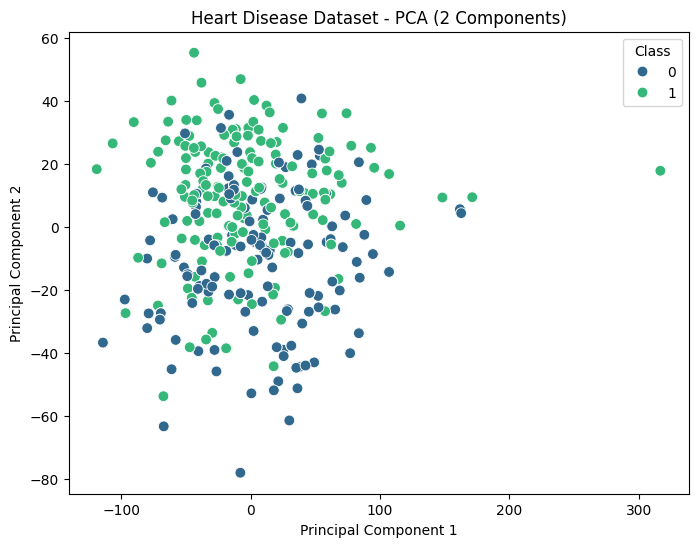

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Function to apply PCA and plot the results
def apply_pca_and_plot(X, y, dataset_name, n_components=2):
    # Step 1: Apply PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # Step 2: Plot the explained variance
    explained_variance = pca.explained_variance_ratio_
    print(f"{dataset_name} Dataset - Explained Variance by Principal Components: {explained_variance}")

    # Step 3: Visualize the Principal Components (only if n_components is 2 for 2D visualization)
    if n_components == 2:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', s=60)
        plt.title(f"{dataset_name} Dataset - PCA (2 Components)")
        plt.xlabel("Principal Component 1")
        plt.ylabel("Principal Component 2")
        plt.legend(title="Class")
        plt.show()

    return X_pca

# Step 4: Apply PCA to Iris and Heart Disease datasets
print("Applying PCA on Iris Dataset")
X_pca_iris = apply_pca_and_plot(X_iris, y_iris, "Iris")

print("Applying PCA on Heart Disease Dataset")
X_pca_heart = apply_pca_and_plot(X_heart, y_heart, "Heart Disease")


In [7]:
# Apply PCA to get individual components
pca = PCA(n_components=2)
X_pca_iris = pca.fit_transform(X_iris)
X_pca_heart = pca.fit_transform(X_heart)

# Split 1st and 2nd PCA components for 50-50 training and testing
X_iris_pca1 = X_pca_iris[:, 0].reshape(-1, 1)  # Only 1st component for Iris
X_iris_pca2 = X_pca_iris[:, 1].reshape(-1, 1)  # Only 2nd component for Iris

X_heart_pca1 = X_pca_heart[:, 0].reshape(-1, 1)  # Only 1st component for Heart Disease
X_heart_pca2 = X_pca_heart[:, 1].reshape(-1, 1)  # Only 2nd component for Heart Disease

# Split data for each component (50-50 train-test split)
X_train_iris_pca1, X_test_iris_pca1, y_train_iris, y_test_iris = train_test_split(X_iris_pca1, y_iris, test_size=0.5, random_state=42)
X_train_iris_pca2, X_test_iris_pca2, y_train_iris, y_test_iris = train_test_split(X_iris_pca2, y_iris, test_size=0.5, random_state=42)

X_train_heart_pca1, X_test_heart_pca1, y_train_heart, y_test_heart = train_test_split(X_heart_pca1, y_heart, test_size=0.5, random_state=42)
X_train_heart_pca2, X_test_heart_pca2, y_train_heart, y_test_heart = train_test_split(X_heart_pca2, y_heart, test_size=0.5, random_state=42)

# Train SVM classifier and evaluate for each dataset component

# 1st PCA Component - Iris
svm_iris_pca1 = SVC(kernel='linear', random_state=42)
svm_iris_pca1.fit(X_train_iris_pca1, y_train_iris)
y_pred_iris_pca1 = svm_iris_pca1.predict(X_test_iris_pca1)
print("Iris Dataset - 1st PCA Component - Classification Report:\n", classification_report(y_test_iris, y_pred_iris_pca1))
print("Iris Dataset - 1st PCA Component - Accuracy:", accuracy_score(y_test_iris, y_pred_iris_pca1))

# 2nd PCA Component - Iris
svm_iris_pca2 = SVC(kernel='linear', random_state=42)
svm_iris_pca2.fit(X_train_iris_pca2, y_train_iris)
y_pred_iris_pca2 = svm_iris_pca2.predict(X_test_iris_pca2)
print("Iris Dataset - 2nd PCA Component - Classification Report:\n", classification_report(y_test_iris, y_pred_iris_pca2))
print("Iris Dataset - 2nd PCA Component - Accuracy:", accuracy_score(y_test_iris, y_pred_iris_pca2))

# 1st PCA Component - Heart Disease
svm_heart_pca1 = SVC(kernel='linear', random_state=42)
svm_heart_pca1.fit(X_train_heart_pca1, y_train_heart)
y_pred_heart_pca1 = svm_heart_pca1.predict(X_test_heart_pca1)
print("Heart Disease Dataset - 1st PCA Component - Classification Report:\n", classification_report(y_test_heart, y_pred_heart_pca1))
print("Heart Disease Dataset - 1st PCA Component - Accuracy:", accuracy_score(y_test_heart, y_pred_heart_pca1))

# 2nd PCA Component - Heart Disease
svm_heart_pca2 = SVC(kernel='linear', random_state=42)
svm_heart_pca2.fit(X_train_heart_pca2, y_train_heart)
y_pred_heart_pca2 = svm_heart_pca2.predict(X_test_heart_pca2)
print("Heart Disease Dataset - 2nd PCA Component - Classification Report:\n", classification_report(y_test_heart, y_pred_heart_pca2))
print("Heart Disease Dataset - 2nd PCA Component - Accuracy:", accuracy_score(y_test_heart, y_pred_heart_pca2))


Iris Dataset - 1st PCA Component - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.85      1.00      0.92        23
           2       1.00      0.83      0.90        23

    accuracy                           0.95        75
   macro avg       0.95      0.94      0.94        75
weighted avg       0.95      0.95      0.95        75

Iris Dataset - 1st PCA Component - Accuracy: 0.9466666666666667
Iris Dataset - 2nd PCA Component - Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.50      0.61      0.55        23
           2       0.32      0.65      0.43        23

    accuracy                           0.39        75
   macro avg       0.27      0.42      0.33        75
weighted avg       0.25      0.39      0.30        75

Iris Dataset - 2nd PCA Component - Accuracy: 0.386666666

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Heart Disease Dataset - 1st PCA Component - Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.37      0.44       254
           1       0.53      0.70      0.61       259

    accuracy                           0.54       513
   macro avg       0.54      0.54      0.52       513
weighted avg       0.54      0.54      0.52       513

Heart Disease Dataset - 1st PCA Component - Accuracy: 0.5380116959064327
Heart Disease Dataset - 2nd PCA Component - Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.66      0.69       254
           1       0.69      0.75      0.72       259

    accuracy                           0.70       513
   macro avg       0.70      0.70      0.70       513
weighted avg       0.70      0.70      0.70       513

Heart Disease Dataset - 2nd PCA Component - Accuracy: 0.7037037037037037
